In [5]:
import pandas as pd
import matplotlib.pyplot as plt

* age (age in years)
* sex (1 = male; 0 = female)
* cp (chest pain type 0-4)
* trestbps (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholestoral in mg/dl)
* fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg (resting electrocardiographic results 0-2)
* thalach (maximum heart rate achieved)
* exang (exercise induced angina (1 = yes; 0 = no))
* oldpeak (ST depression induced by exercise relative to rest)
* slope (the slope of the peak exercise ST segment(0-2))
* ca (number of major vessels (0-3) colored by flourosopy)
* thal (1 = normal; 2 = fixed defect; 3 = reversable defect)
* target (1 = heart disease, 0 = no heart disease)

In [6]:
#Read in dataset
heart_df=pd.read_csv('Data/heart.csv')

Let's make some initital observations

In [7]:
#Get head of the dataset
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
heart_df_nums=heart_df[['age','chol','trestbps','thalach','oldpeak']]

In [10]:
#Let's get the distribution of the numerical columns
heart_df_nums.describe()

,age,chol,trestbps,thalach,oldpeak
count,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,246.00000,131.611707,149.114146,1.071512
std,9.072290,51.59251,17.516718,23.005724,1.175053
min,29.000000,126.00000,94.000000,71.000000,0.000000
25%,48.000000,211.00000,120.000000,132.000000,0.000000
50%,56.000000,240.00000,130.000000,152.000000,0.800000
75%,61.000000,275.00000,140.000000,166.000000,1.800000
max,77.000000,564.00000,200.000000,202.000000,6.200000


Let's make some distribution plots

<AxesSubplot:ylabel='Frequency'>

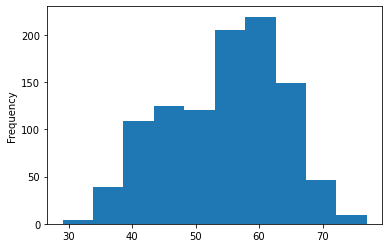

In [6]:
#Let's check out a distribution
heart_df['age'].plot(kind='hist')

<AxesSubplot:xlabel='target'>

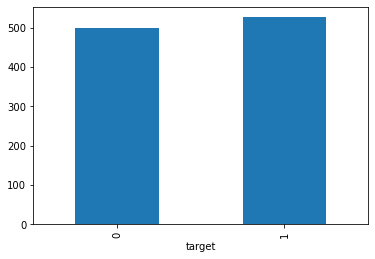

In [9]:
#Let's check out a categorical distribution
heart_df.groupby('target').count()['age'].plot(kind='bar')
#Fortunately, we have a pretty even distribution of target outputs

Now we can see categorical relations

<AxesSubplot:xlabel='cp'>

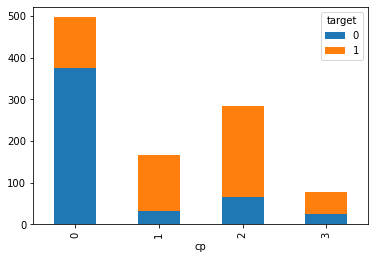

In [22]:
#Let's make a stacked bar chart
heart_df.groupby(['cp','target']).count()['age'].unstack().plot(kind='bar',stacked=True)
#You can see some interesting relations


* Most people with a chest pain val of 0 have no disease, while most people with anything above 0 have higher frequncies of chest pain
* Potential Feature engineering would be to turn this into a binary column of only 0 or 1

target    0    1
exang           
0       225  455
1       274   71
target    0    1
slope           
0        46   28
1       324  158
2       129  340
target    0    1
fbs             
0       417  455
1        82   71
target    0    1
sex             
0        86  226
1       413  300
target    0    1
thal            
0         4    3
1        43   21
2       132  412
3       320   90


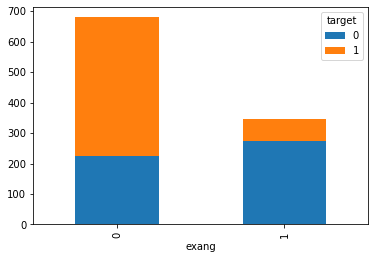

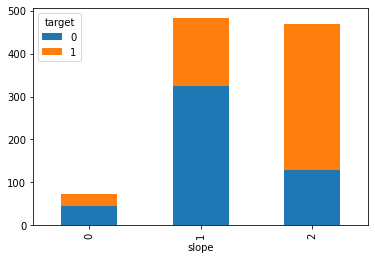

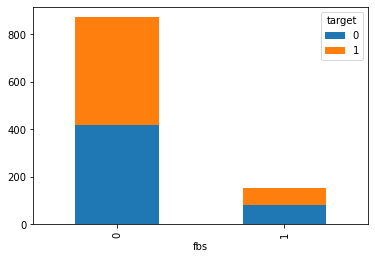

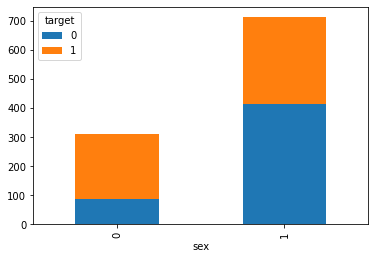

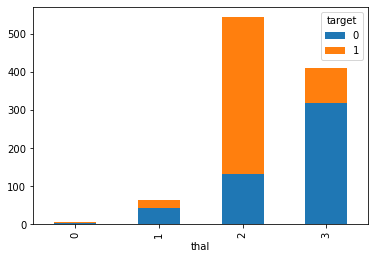

In [27]:
#Let's see if we can find any relationships between the categorical varibles and the target
#Iterate through cat columns
for i in ['exang','slope','fbs','sex','thal']:
    #Create plots
    stacked_df=heart_df.groupby([i,'target']).count()['age'].unstack()
    stacked_df.plot(kind='bar',stacked=True)
    print(stacked_df)

* You can see some relationships in these plots, 
* Slopes of 1 and 2 seem to be correlated with the target
* Exang seems to also have a relationship with the target
* Thal of 2 seems to have way more values of target 1, this could be turned into a binary variable
* Some concerns arise with uneven distributions of these categories

____________________exang________________________
slope   0    1    2
exang              
0      40  258  382
1      34  224   87
fbs      0   1
exang         
0      587  93
1      285  60
sex      0    1
exang          
0      238  442
1       74  271
thal   0   1    2    3
exang                 
0      3  35  440  202
1      4  29  104  208
cp       0    1    2   3
exang                   
0      214  155  247  64
1      283   12   37  13
____________________slope________________________
exang    0    1
slope          
0       40   34
1      258  224
2      382   87
fbs      0   1
slope         
0       53  21
1      416  66
2      403  66
sex      0    1
slope          
0       17   57
1      150  332
2      145  324
thal     0     1      2      3
slope                         
0      NaN  11.0   27.0   36.0
1      4.0  46.0  187.0  245.0
2      3.0   7.0  330.0  129.0
cp       0    1    2   3
slope                   
0       42    8   15   9
1      292   41  110  39
2      163  11

C:\Users\baker\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


exang    0    1
thal           
0        3    4
1       35   29
2      440  104
3      202  208
slope     0      1      2
thal                     
0       NaN    4.0    3.0
1      11.0   46.0    7.0
2      27.0  187.0  330.0
3      36.0  245.0  129.0
fbs     0   1
thal         
0       3   4
1      46  18
2     479  65
3     344  66
sex     0    1
thal          
0       3    4
1       4   60
2     252  292
3      53  357
cp        0      1      2     3
thal                           
0       4.0    NaN    3.0   NaN
1      42.0    7.0    8.0   7.0
2     175.0  127.0  199.0  43.0
3     276.0   33.0   74.0  27.0
____________________cp________________________
exang    0    1
cp             
0      214  283
1      155   12
2      247   37
3       64   13
slope   0    1    2
cp                 
0      42  292  163
1       8   41  118
2      15  110  159
3       9   39   29
fbs    0   1
cp          
0    431  66
1    151  16
2    229  55
3     61  16
sex    0    1
cp           
0    133  364

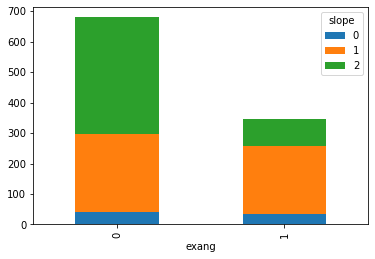

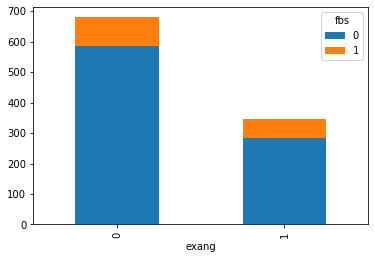

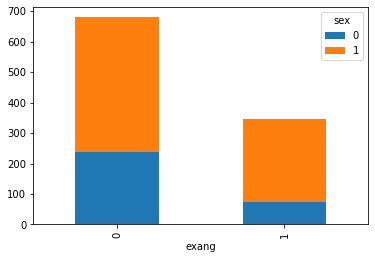

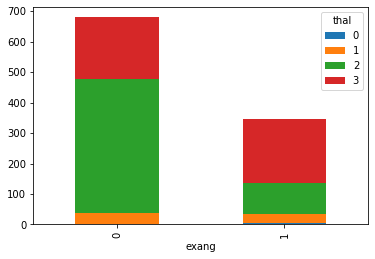

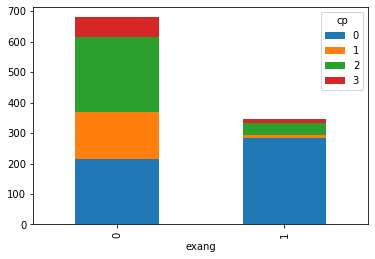

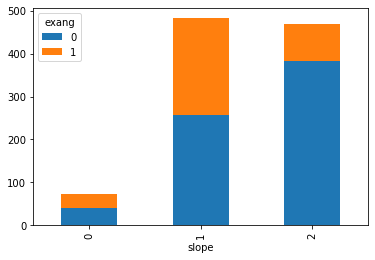

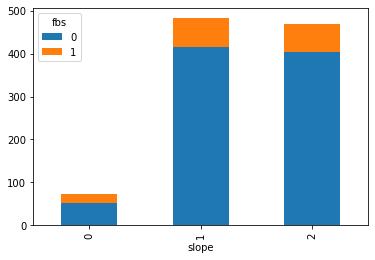

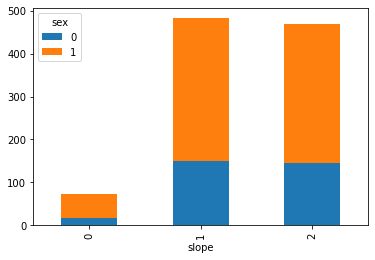

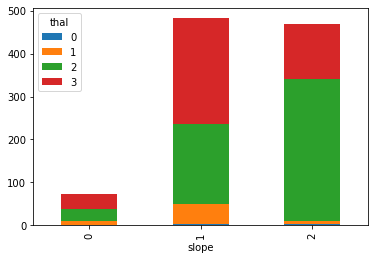

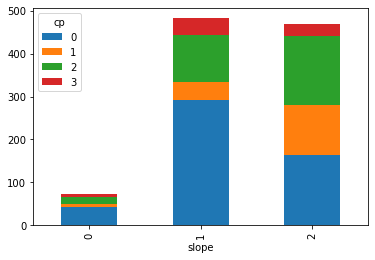

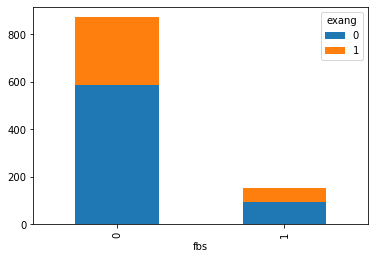

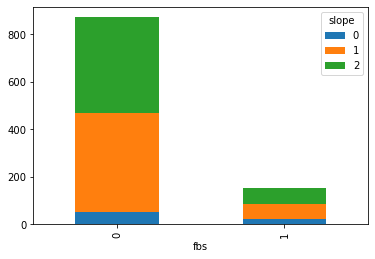

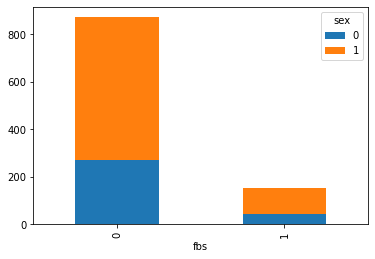

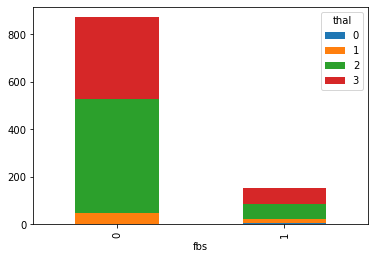

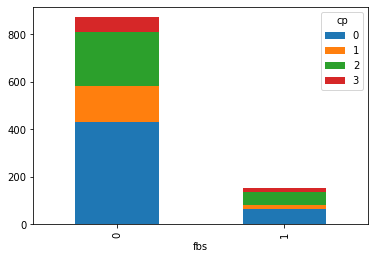

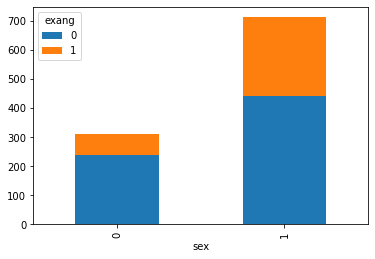

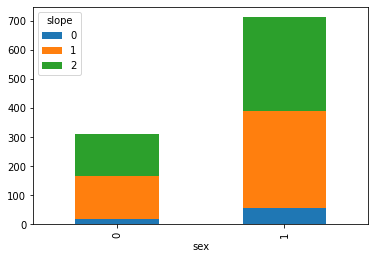

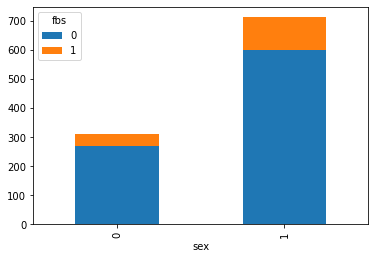

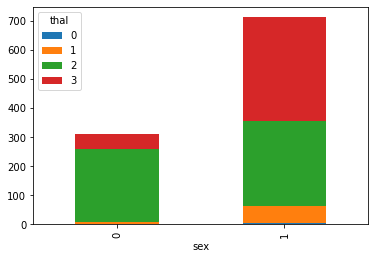

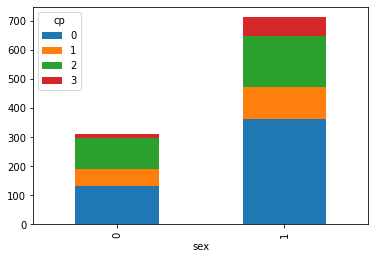

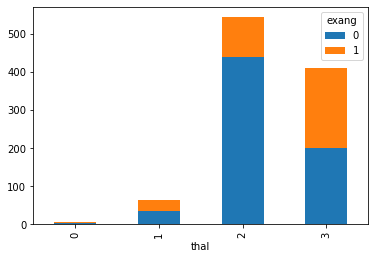

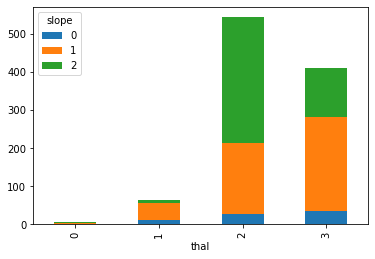

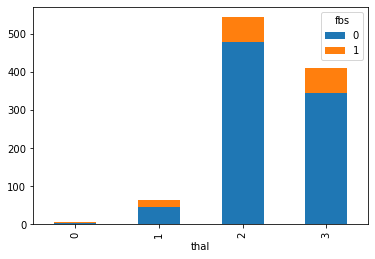

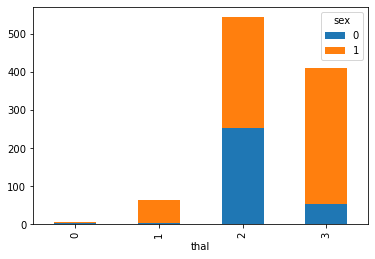

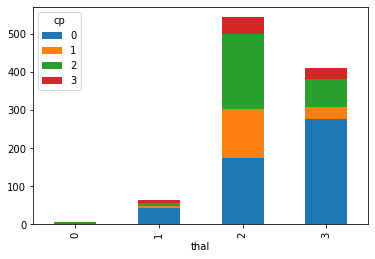

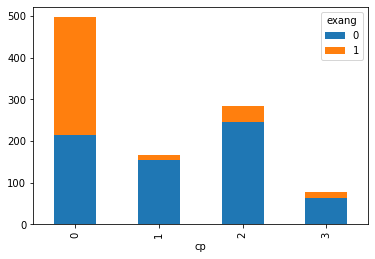

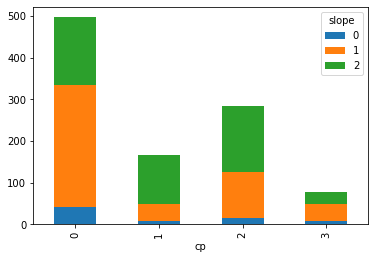

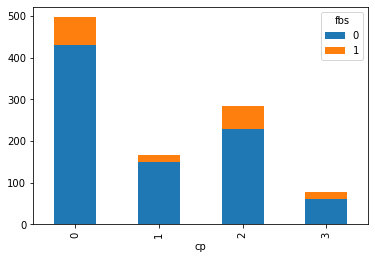

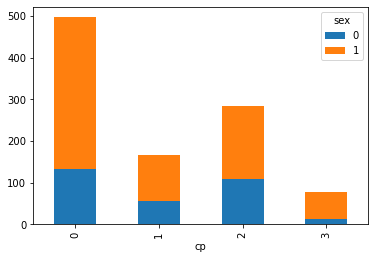

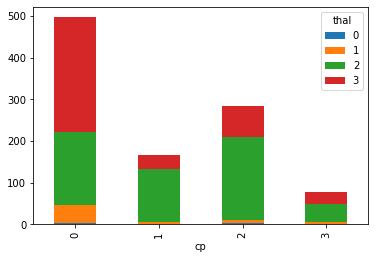

In [38]:
#Let's find the relationships between all the categorical variables 
cat_cols=['exang','slope','fbs','sex','thal','cp']
cat_cols_cp=cat_cols.copy()
#Let's iterate through each cat column
for i in cat_cols:
    print('____________________'+i+'________________________')
    #iterate through the cat cols again
    for j in cat_cols_cp:
        #Exclude the same columns
        if i!=j:
            #Create plots
            stacked_df=heart_df.groupby([i,j]).count()['age'].unstack()
            stacked_df.plot(kind='bar',stacked=True)
            print(stacked_df)
    

Now let's see scatter plots

<AxesSubplot:xlabel='age', ylabel='chol'>

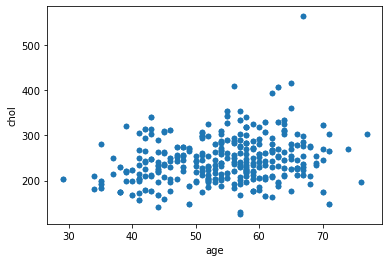

In [7]:
#Let's make a scatter plot to see relationships between two numerical vars
heart_df.plot('age','chol',kind='scatter')

In [27]:
#Let's see the relationship between our numeric variables and the target
for i in ['age','chol','trestbps','thalach','oldpeak']:
    m_df=heart_df.groupby('target').mean()[i]
    print('___________'+i+'_____________')
    print('mean')
    print(m_df)
    s_df=heart_df.groupby('target').std()[i]
    print('spread')
    print(s_df)

___________age_____________
mean
target
0    56.569138
1    52.408745
Name: age, dtype: float64
spread
target
0    7.908153
1    9.631804
Name: age, dtype: float64
___________chol_____________
mean
target
0    251.292585
1    240.979087
Name: chol, dtype: float64
spread
target
0    49.558924
1    53.010345
Name: chol, dtype: float64
___________trestbps_____________
mean
target
0    134.106212
1    129.245247
Name: trestbps, dtype: float64
spread
target
0    18.576736
1    16.112188
Name: trestbps, dtype: float64
___________thalach_____________
mean
target
0    139.130261
1    158.585551
Name: thalach, dtype: float64
spread
target
0    22.565235
1    19.096928
Name: thalach, dtype: float64
___________oldpeak_____________
mean
target
0    1.600200
1    0.569962
Name: oldpeak, dtype: float64
spread
target
0    1.290956
1    0.771079
Name: oldpeak, dtype: float64


* This may not be the most effective way to find these relationships, let's try a different method
* The only interesting difference seems to be oldpeak, and even then, the spreads overlap

In [25]:
#Let's make the some color
color_dict={0:'blue',1:'red'}
heart_df['color']=[color_dict[i] for i in heart_df['target']]

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='trestbps', ylabel='age'>,
        <AxesSubplot:xlabel='thalach', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>,
        <AxesSubplot:xlabel='trestbps', ylabel='chol'>,
        <AxesSubplot:xlabel='thalach', ylabel='chol'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='chol'>],
       [<AxesSubplot:xlabel='age', ylabel='trestbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trestbps'>,
        <AxesSubplot:xlabel='trestbps', ylabel='trestbps'>,
        <AxesSubplot:xlabel='thalach', ylabel='trestbps'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='trestbps'>],
       [<AxesSubplot:xlabel='age', ylabel='thalach'>,
        <AxesSubplot:xlabel='chol', ylabel='thalach'>,
        <AxesSubplot:xlabel='trestbps', ylabel='thalach'>,
       

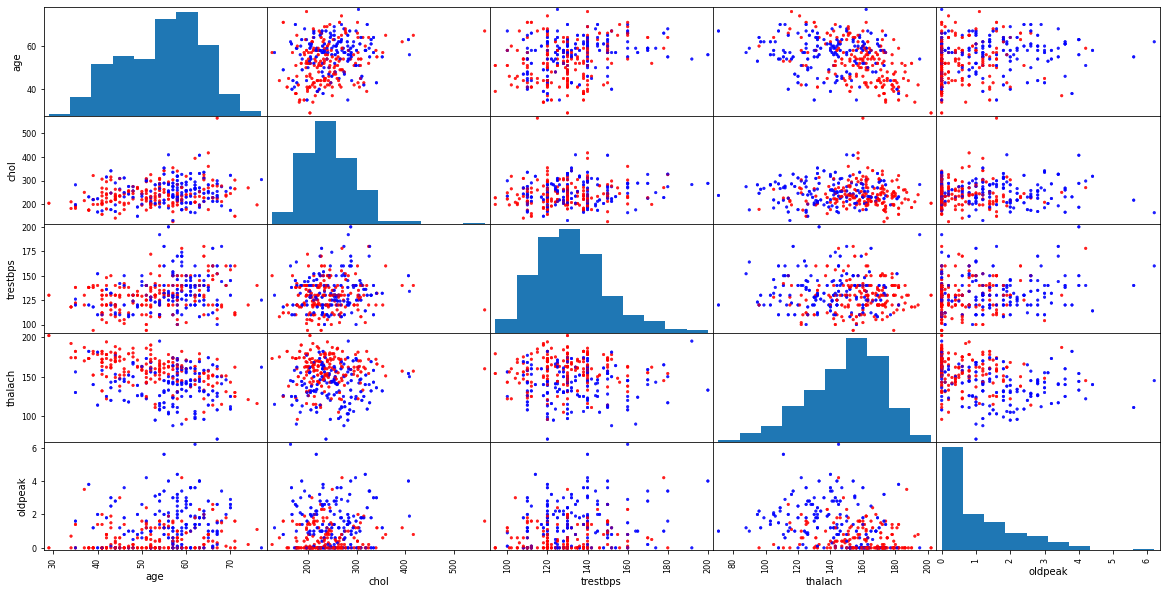

In [26]:
#Let's make a scatter matrix
pd.plotting.scatter_matrix(heart_df[['age','chol','trestbps','thalach','oldpeak']],figsize=(20,10),color=heart_df['color'])

* Smaller old peaks seem to be have higher concetrations of heart disease
* There seems to be a higher concentration of heart disease amoung people who are middle aged
* Chol around 200-300 seem to have higher concetrations of heart disease
* Higher thalach seems to have a higher concentrations of heart disease
* There are some correlations present (thalach,age, and age, chol), but all seem rather weak
* Most distributions seem to be normally distribution, but some outliers are present and oldpeak is heavily concentrated at 0